# Employee Attrition

## Exploratory data analysis

**Dataset**: From Kaggle by IBM

**Objective**:
* To explore the dataset and it's different features
* Understand the relationship between the different varaibles
* Find the variables that tend to have a larger number of employees with positive attrition


## 1. Exploring the dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Checking the shape of the dataset
print('Rows x Columns =', df.shape[0], 'x', df.shape[1])

Rows x Columns = 1470 x 35


In [5]:
#read all column names
print('Features of the dataset are:')
print(*df.columns.tolist(), sep = ', ')

Features of the dataset are:
Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager


In [6]:
#The features and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Print all data type and their unique names
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("----------------------------------------")

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------------
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
-----------------------------------

## 2. Cleaning the dataset

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.isnull().sum().any()

False

In [10]:
#dropping unnecessary columns
df = df.drop(['Over18','StandardHours','EmployeeCount', 'EmployeeNumber'], axis=1)

In [11]:
#Mapping variables
Attrition_map = {"Yes" : 1, "No": 0}
df['Attrition']=df['Attrition'].map(Attrition_map)

Education_map = {1:"Below College", 2 :'College' ,3 : 'Bachelor' , 4 :'Master', 5 :'Doctor'}
df['Education'] = df['Education'].map(Education_map)

EnvironmentSatisfaction_map = {1 :"Low", 2:"Medium", 3:"High", 4:"Very High"}
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].map(EnvironmentSatisfaction_map)

JobInvolvement_map = {1 :"Low", 2:"Medium", 3:"High", 4:"Very High"}
df["JobInvolvement"] = df["JobInvolvement"].map(JobInvolvement_map)

JobSatisfaction_map = {1 :"Low", 2:"Medium", 3:"High", 4:"Very High"}
df["JobSatisfaction"] = df["JobSatisfaction"].map(JobSatisfaction_map)

PerformanceRating_map = {1 :"Low", 2:"Medium", 3:"High", 4:"Outstanding"}
df["PerformanceRating"] = df["PerformanceRating"].map(PerformanceRating_map)

RelationshipSatisfaction_map = {1 :"Low", 2:"Medium", 3:"High", 4:"Outstanding"}
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].map(RelationshipSatisfaction_map)

WorkLifeBalance_map = {1 :"Low", 2:"Medium", 3:"High", 4:"Outstanding"}
df["WorkLifeBalance"] = df["WorkLifeBalance"].map(WorkLifeBalance_map)

In [12]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [13]:
#Binning Ages
age_labels = ['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60']
df['age_group'] = pd.cut(df.Age, range(18, 61, 5), right=False, labels=age_labels)

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,0,8,0,Low,6,4,0,5,41-45
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,1,10,3,High,10,7,1,7,51-55
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Medium,0,7,3,High,0,0,0,0,36-40
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,High,0,8,3,High,8,7,3,0,36-40
4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Outstanding,1,6,3,High,2,2,2,2,25-30


## 3. Investigating descriptive statistics on the dataset

In [15]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsInCurrentRole'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>

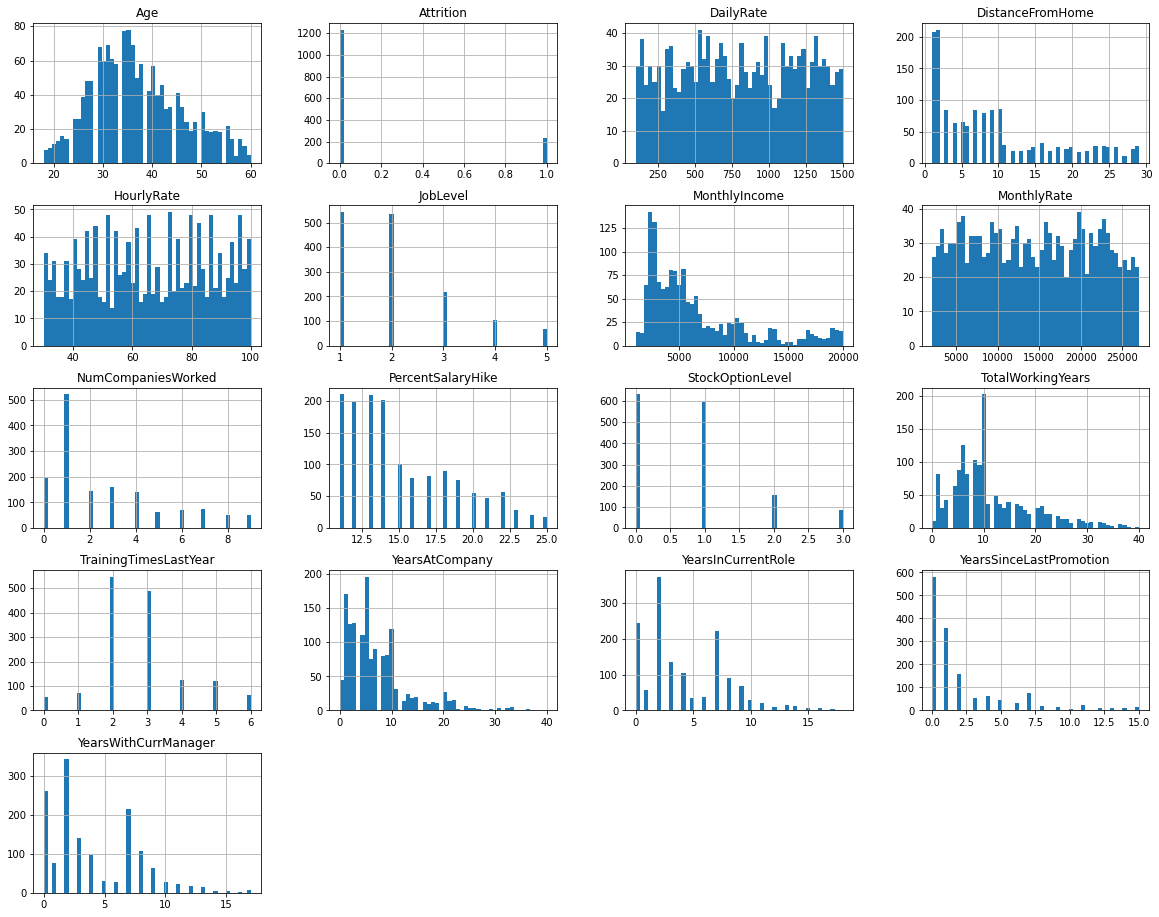

In [16]:
df.hist(bins=50,figsize=(20,16))

In [17]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [18]:
# Percentage employees based on attrition
df['Attrition'].value_counts()/len(df['Attrition'])*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

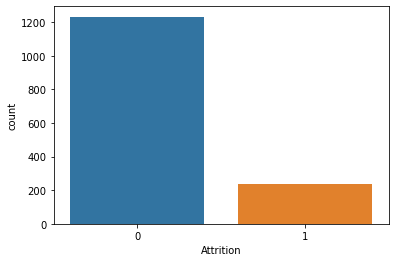

In [19]:
sns.countplot(df['Attrition'])

As found earlier, 83.8% of the employees in the dataset did not choose to leave the organisation, while only 16% of the employees in the dataset suffered from attritition. 
Also, the dataset is imbalanced with respect to variable attrition.

<AxesSubplot:>

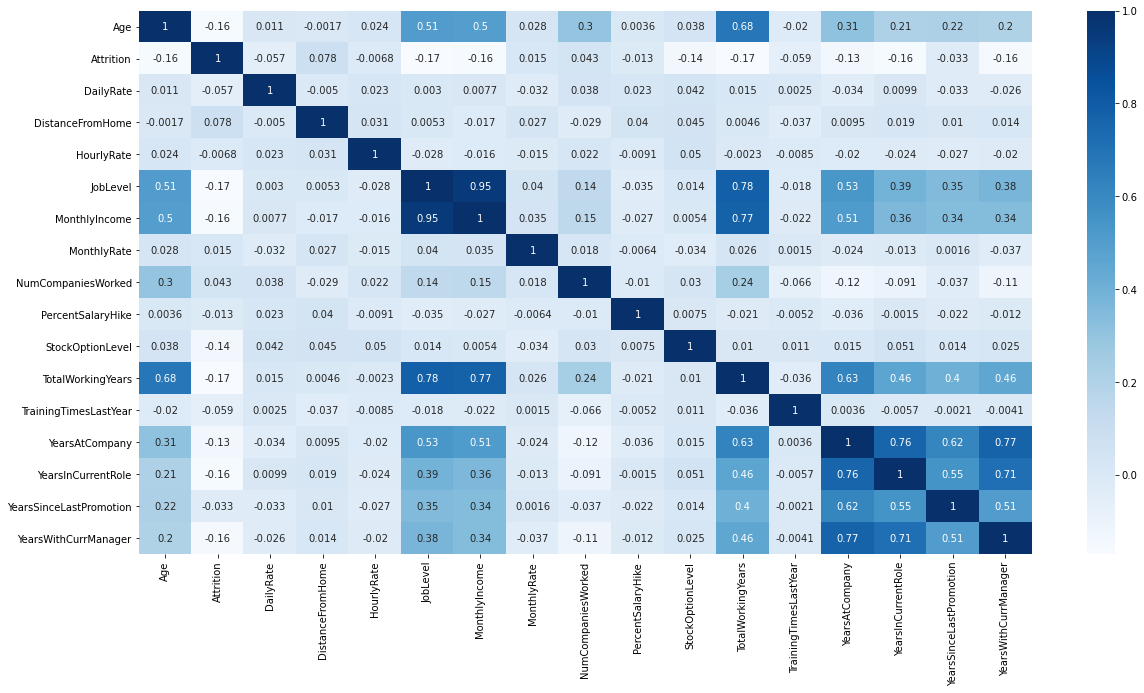

In [20]:
cm = df.corr()
plt.rcParams["figure.figsize"] = [20,10]
sns.heatmap(cm,xticklabels=cm.columns,yticklabels=cm.columns,annot=True,cmap="Blues")

**From the heatmap, we gather:**
* There is a high positive correlation between the *TotalWorkingYears* column and the *JobLevel* and *MonthlyIncome*, which indicates promoting and paying people in the company based on their experience level. 
* There was a high positive correlation between *PerformanceRating* and *PercentSalaryHike* columns, which confirms that the increase in salary is based on the increase in the performance level. 
* The *JobSatisfaction* column does not have any correlation with the reminder of the numeric columns, which requires further analysis, as according to traditional mindset one would assume that there would be an increase with the increase in *MonthlyIncome* or *JobLevel* columns.

#### Normalizing the dataset before further analysis

In [21]:
from sklearn.preprocessing import StandardScaler

standard=df.copy()
val=standard.select_dtypes("int64")

col_names=list(val.columns)

features =  val[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

standard[col_names] = features
standard.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,0.446350,2.280906,Travel_Rarely,0.742527,Sales,-1.010909,College,Life Sciences,Medium,Female,...,Low,-0.932014,-0.421642,-2.171982,Low,-0.164613,-0.063296,-0.679146,0.245834,41-45
1,1.322365,-0.438422,Travel_Frequently,-1.297775,Research & Development,-0.147150,Below College,Life Sciences,High,Male,...,Outstanding,0.241988,-0.164511,0.155707,High,0.488508,0.764998,-0.368715,0.806541,51-55
2,0.008343,2.280906,Travel_Rarely,1.414363,Research & Development,-0.887515,College,Other,Very High,Male,...,Medium,-0.932014,-0.550208,0.155707,High,-1.144294,-1.167687,-0.679146,-1.155935,36-40
3,-0.429664,-0.438422,Travel_Frequently,1.461466,Research & Development,-0.764121,Master,Life Sciences,Very High,Female,...,High,-0.932014,-0.421642,0.155707,High,0.161947,0.764998,0.252146,-1.155935,36-40
4,-1.086676,-0.438422,Travel_Rarely,-0.524295,Research & Development,-0.887515,Below College,Medical,Low,Male,...,Outstanding,0.241988,-0.678774,0.155707,High,-0.817734,-0.615492,-0.058285,-0.595227,25-30


## Visualizing distributions of the features

<AxesSubplot:xlabel='Education', ylabel='Age'>

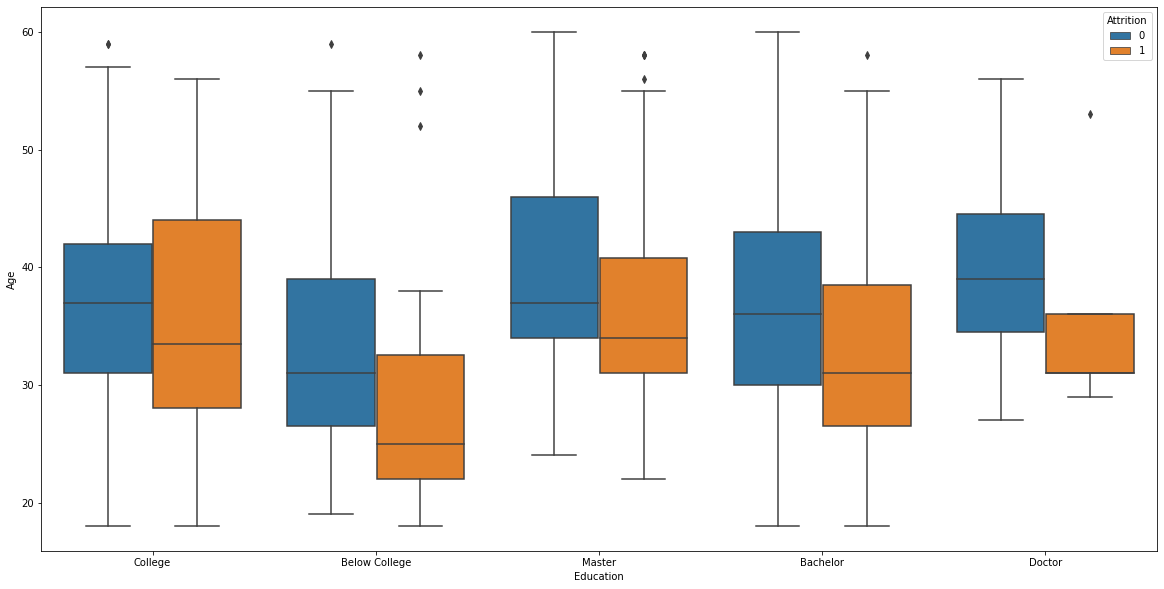

In [22]:
sns.boxplot(x = df['Education'], y = df['Age'], data = df, hue = df['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

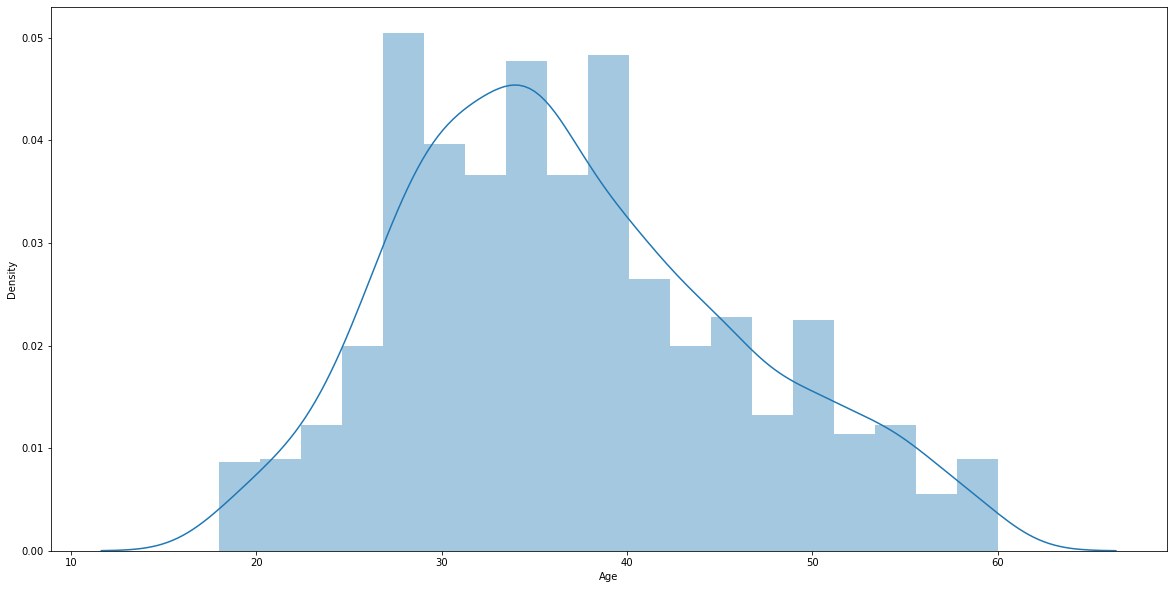

In [23]:
sns.distplot(df['Age'])

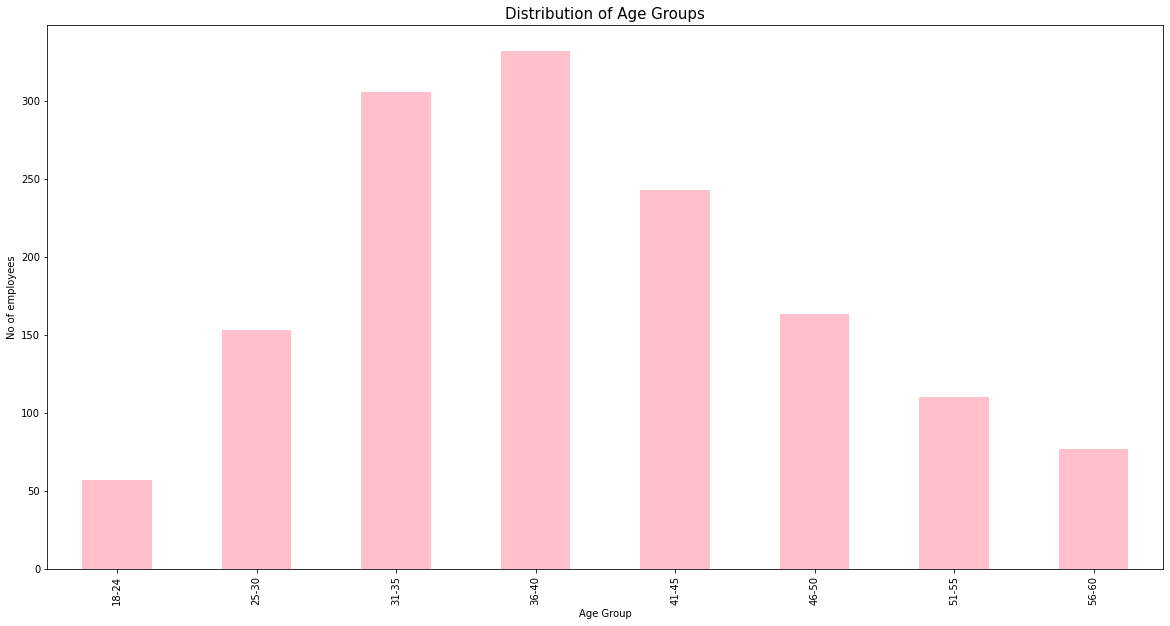

In [35]:
df.groupby(['age_group']).size().plot(kind='bar',stacked=True, color = 'pink')
plt.title("Distribution of Age Groups",fontsize=15)
plt.ylabel('No of employees')
plt.xlabel('Age Group');

In [25]:
positive_attr_df = df.loc[df['Attrition'] == 1]
negative_attr_df = df.loc[df['Attrition'] == 0]

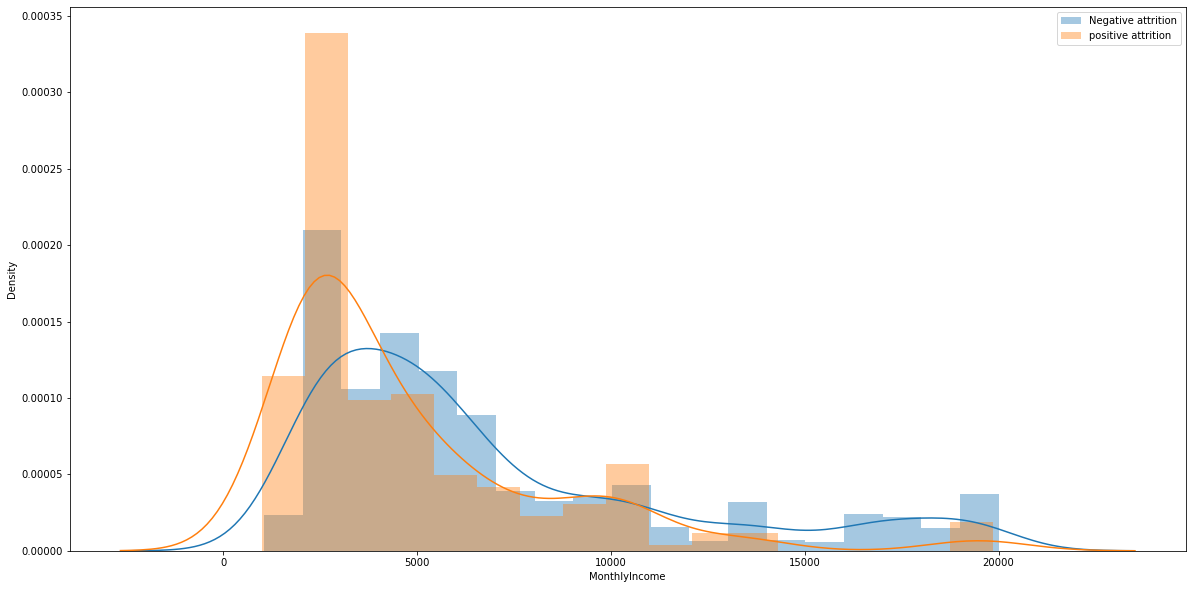

In [26]:
sns.distplot(negative_attr_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attr_df['MonthlyIncome'], label='positive attrition')
plt.legend()

There is high attrition rate among employees of relatively lower salary range, ie. less than 5000.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

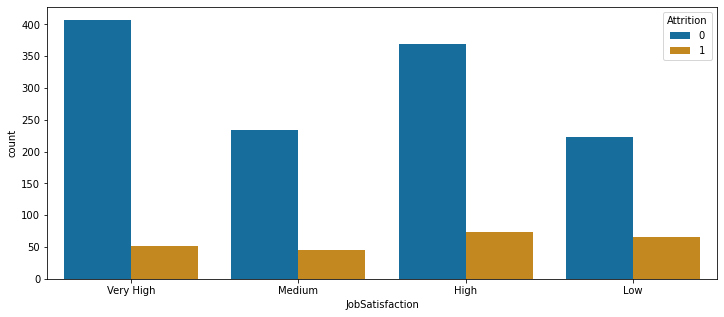

In [27]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = df, palette = 'colorblind')

Job satistfaction does not seem to be an indicator of attrition rate, other factors must have a more prominent effect.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

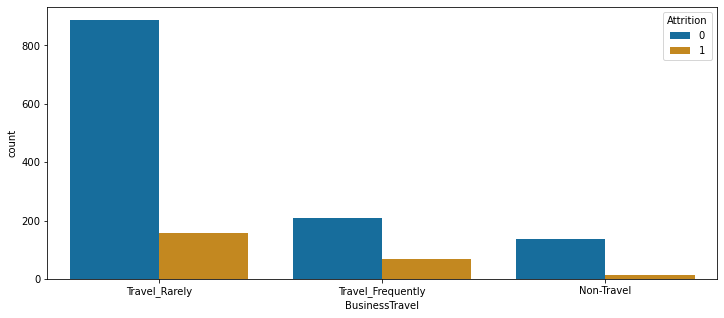

In [28]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'BusinessTravel', hue = 'Attrition', data = df, palette = 'colorblind')

Among the employees who do travel, the ones who travel not as often show a higher rate. 

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

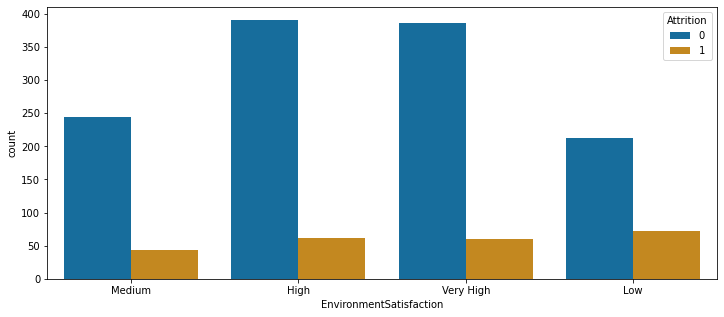

In [29]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = df, palette = 'colorblind')

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

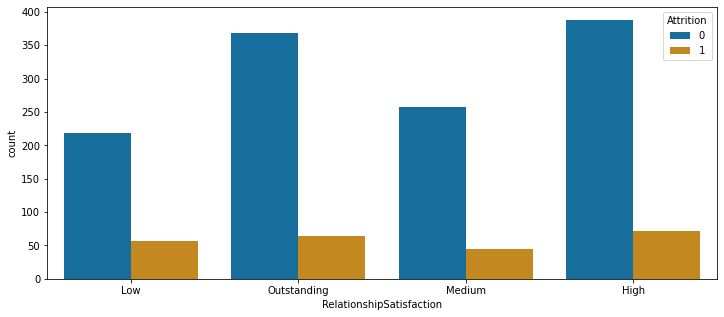

In [30]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'RelationshipSatisfaction', hue = 'Attrition', data = df, palette = 'colorblind')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

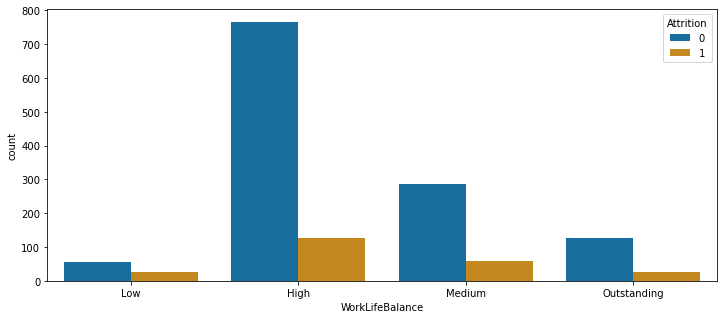

In [31]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'WorkLifeBalance', hue = 'Attrition', data = df, palette = 'colorblind')

<AxesSubplot:xlabel='Gender', ylabel='count'>

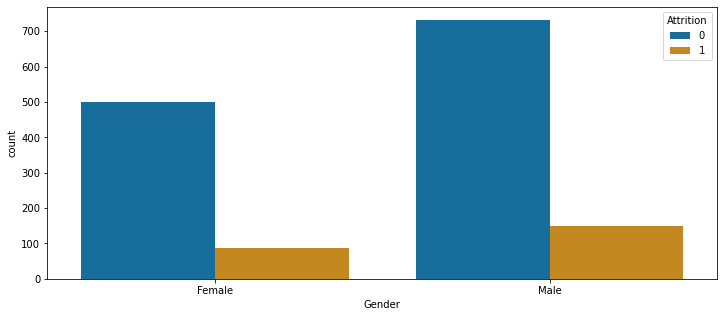

In [32]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'Gender', hue = 'Attrition', data = df, palette = 'colorblind')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

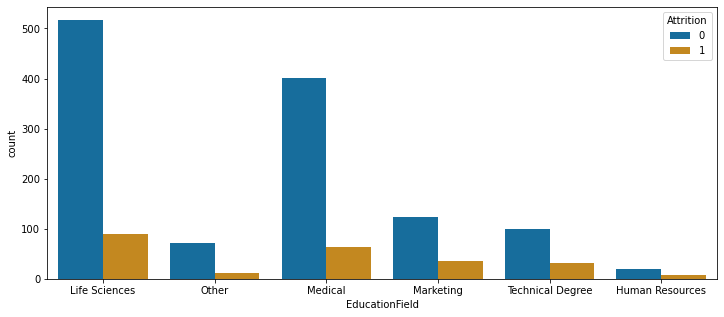

In [33]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'EducationField', hue = 'Attrition', data = df, palette = 'colorblind')